Introduction
In this exercise, I will explore clustering and dimensionality reduction techniques on images, starting from hyperspectral data and moving on to remote sensing data.

Part 1: I will use the k-means clustering method, as well as fuzzy c-means, in combination with the PCA dimensionality reduction method, to analyze a hyperspectral image.

Part 2: I will work with a remote sensing dataset and, with the help of a pre-trained CNN, extract image features for clustering, comparing the results with clustering using pixels.

### Part 1

In [ ]:
import numpy as np

image_path = "salinas_image.npy"
labels_path = "salinas_labels.npy"

salinas_image = np.load(image_path)
salinas_labels = np.load(labels_path)

```python
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
```

In [ ]:
# Extract image dimensions
height, width, num_channels = salinas_image.shape

print(f"Image Height: {height}")
print(f"Image Width: {width}")
print(f"Number of Spectral Channels: {num_channels}")

Image Height: 512
Image Width: 217
Number of Spectral Channels: 204


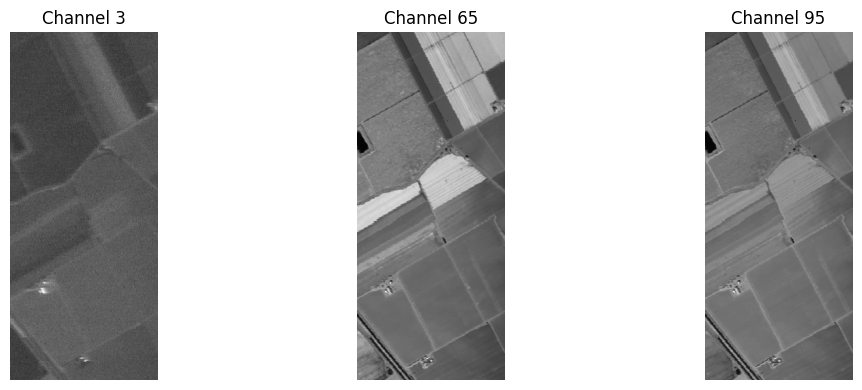

In [ ]:
import matplotlib.pyplot as plt

# Channels to visualize
channels_to_plot = [3, 65, 95]

# Plot the channels
plt.figure(figsize=(12, 4))

for i, channel in enumerate(channels_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.imshow(salinas_image[:, :, channel - 1], cmap='gray')
    plt.title(f"Channel {channel}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Find unique categories in the labels
unique_categories = np.unique(salinas_labels)
num_categories = len(unique_categories)

print(f"Number of unique crop categories: {num_categories}")
print(f"Unique categories: {unique_categories}")

Number of unique crop categories: 17
Unique categories: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


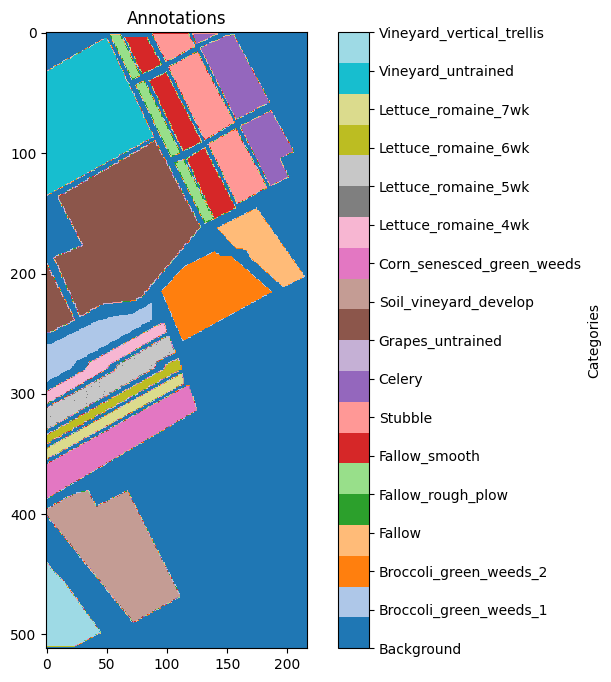

In [ ]:
classes = [
    "Background",
    "Broccoli_green_weeds_1",
    "Broccoli_green_weeds_2",
    "Fallow",
    "Fallow_rough_plow",
    "Fallow_smooth",
    "Stubble",
    "Celery",
    "Grapes_untrained",
    "Soil_vineyard_develop",
    "Corn_senesced_green_weeds",
    "Lettuce_romaine_4wk",
    "Lettuce_romaine_5wk",
    "Lettuce_romaine_6wk",
    "Lettuce_romaine_7wk",
    "Vineyard_untrained",
    "Vineyard_vertical_trellis"
]
# Plot the annotations
plt.figure(figsize=(8, 8))
plt.imshow(salinas_labels, cmap='tab20')
plt.title("Annotations")

# Add a colorbar with labels for the categories
cbar = plt.colorbar(ticks=range(len(classes)))
cbar.ax.set_yticklabels(classes)  # Set the labels for the colorbar
cbar.set_label("Categories")

plt.show()

In [ ]:
unique_categories = np.unique(salinas_labels)

#Counting pixels for each category
pixel_counts = {category: np.sum(salinas_labels == category) for category in unique_categories}


print("Pixel counts per category:")
for category, count in pixel_counts.items():
    category_name = classes[int(category)]
    print(f"{category_name}: {count} pixels")

Pixel counts per category:
Background: 56975 pixels
Broccoli_green_weeds_1: 2009 pixels
Broccoli_green_weeds_2: 3726 pixels
Fallow: 1976 pixels
Fallow_rough_plow: 1394 pixels
Fallow_smooth: 2678 pixels
Stubble: 3959 pixels
Celery: 3579 pixels
Grapes_untrained: 11271 pixels
Soil_vineyard_develop: 6203 pixels
Corn_senesced_green_weeds: 3278 pixels
Lettuce_romaine_4wk: 1068 pixels
Lettuce_romaine_5wk: 1927 pixels
Lettuce_romaine_6wk: 916 pixels
Lettuce_romaine_7wk: 1070 pixels
Vineyard_untrained: 7268 pixels
Vineyard_vertical_trellis: 1807 pixels


In [ ]:
# Reshape image to N x K (pixels x channels)
N, K = salinas_image.shape[0] * salinas_image.shape[1], salinas_image.shape[2]
reshaped_image = salinas_image.reshape(N, K)

# Reshape labels to vector of length N
reshaped_labels = salinas_labels.flatten()

print(f"Reshaped image dimensions: {reshaped_image.shape}")
print(f"Reshaped labels dimensions: {reshaped_labels.shape}")


Reshaped image dimensions: (111104, 204)
Reshaped labels dimensions: (111104,)


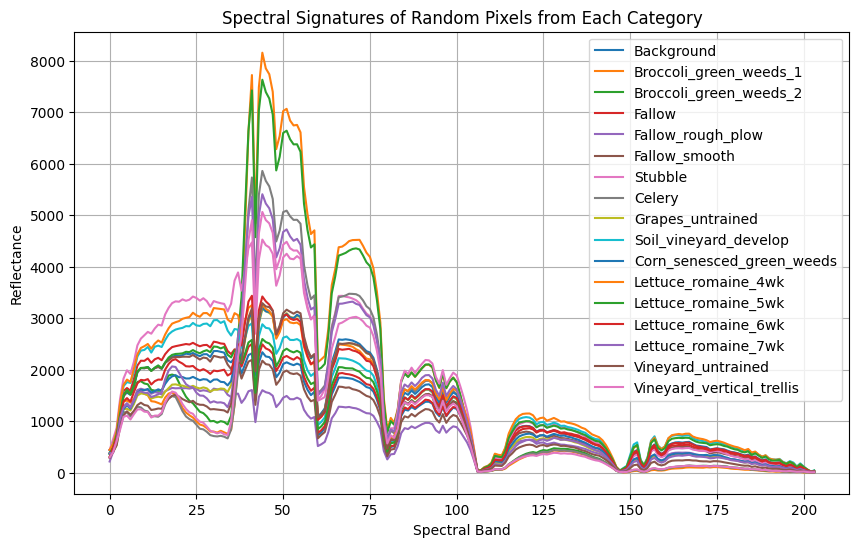

In [ ]:
import random
import matplotlib.pyplot as plt

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through unique categories
for category in unique_categories:
    # Select a random pixel index for the category
    category_indices = np.where(reshaped_labels == category)[0]
    random_pixel = random.choice(category_indices)

    # Get spectral signature for the pixel
    spectral_signature = reshaped_image[random_pixel, :]

    # Get the class name for the category
    category_name = classes[int(category)]

    # Plot the spectral signature
    plt.plot(spectral_signature, label=f"{category_name}")

plt.title("Spectral Signatures of Random Pixels from Each Category")
plt.xlabel("Spectral Band")
plt.ylabel("Reflectance")
plt.legend()
plt.grid(True)
plt.show()


Based on the spectral signatures plotted, it is observed that some crop categories are more easily distinguishable than others. For example, categories that exhibit large differences in specific spectral channels, such as Broccoli_green_weeds_1 and Fallow_rough_plow, can be easily differentiated. However, categories with similar spectral signatures overlap, which makes separating them difficult.

Moreover, not all spectral channels provide the same useful information for differentiation. Some channels show large variations between categories and are more critical, while others seem to be less useful.

Dimensionality reduction techniques, such as PCA, could help in identifying the most important channels by retaining only the information that is essential for the analysis.

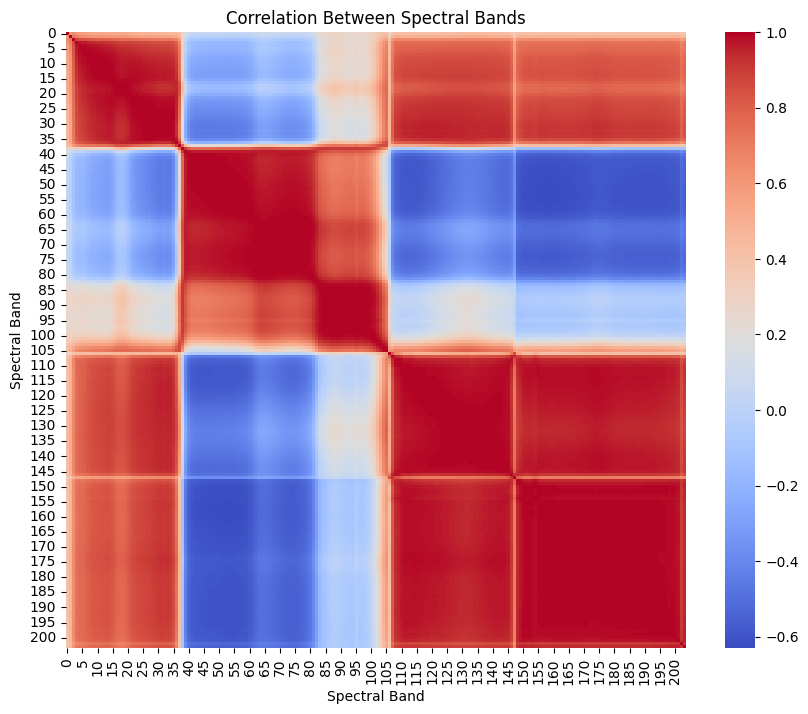

In [ ]:
import seaborn as sns

# Compute correlation matrix
correlation_matrix = np.corrcoef(reshaped_image.T)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Correlation Between Spectral Bands")
plt.xlabel("Spectral Band")
plt.ylabel("Spectral Band")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply KMeans with n_clusters=17 (number of categories including background)
kmeans = KMeans(n_clusters=17, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(reshaped_image)

# Calculate Adjusted Rand Index (ARI)
ari_score = adjusted_rand_score(reshaped_labels, kmeans_labels)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(reshaped_image, kmeans_labels)

print(f"Adjusted Rand Index (ARI): {ari_score:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")


Adjusted Rand Index (ARI): 0.147
Silhouette Score: 0.413


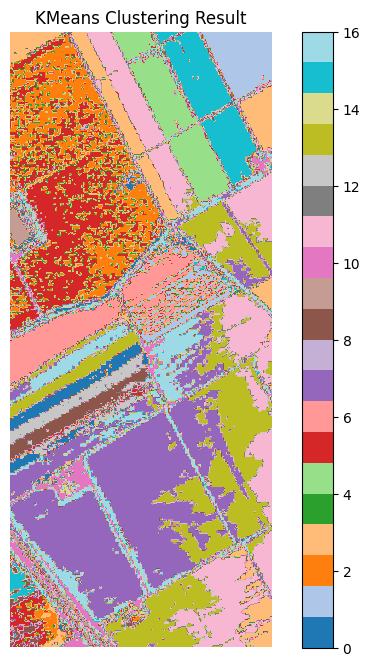

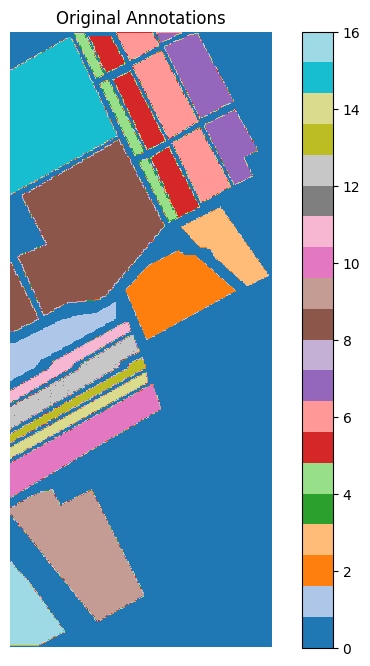

In [ ]:
# Reshape the KMeans labels to match the original image dimensions
kmeans_image = kmeans_labels.reshape(salinas_labels.shape)

# Plot the KMeans clustering
plt.figure(figsize=(8, 8))
plt.imshow(kmeans_image, cmap='tab20')
plt.title("KMeans Clustering Result")
plt.axis('off')
plt.colorbar()
plt.show()

# Plot the original annotations for comparison
plt.figure(figsize=(8, 8))
plt.imshow(salinas_labels, cmap='tab20')
plt.title("Original Annotations")
plt.axis('off')
plt.colorbar()
plt.show()


We observe that the clustering result with KMeans differs slightly from the initial annotations. This is expected, as KMeans tries to find clusters based solely on the pixel spectral characteristics, without knowing the actual categories.

Specifically, in some areas, KMeans managed to group the pixels into clusters that match quite well with the original categories. However, there are areas where the clusters do not correspond to the actual categories. This may be due to:

Similar spectral signatures among different categories.  
Limitations of KMeans, as it assumes that clusters have a spherical distribution.

In [ ]:
!pip install fuzzy-c-means

In [ ]:
from fcmeans import FCM
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply Fuzzy C-Means with 17 clusters
fcm = FCM(n_clusters=17, random_state=42)
fcm.fit(reshaped_image)

# Get cluster assignments (crisp labels)
fcm_labels = fcm.predict(reshaped_image)

# Calculate Adjusted Rand Index (ARI)
ari_score_fcm = adjusted_rand_score(reshaped_labels, fcm_labels)

# Calculate Silhouette Score
silhouette_avg_fcm = silhouette_score(reshaped_image, fcm_labels)

print(f"Adjusted Rand Index (FCM): {ari_score_fcm:.3f}")
print(f"Silhouette Score (FCM): {silhouette_avg_fcm:.3f}")

Adjusted Rand Index (FCM): 0.135
Silhouette Score (FCM): 0.357


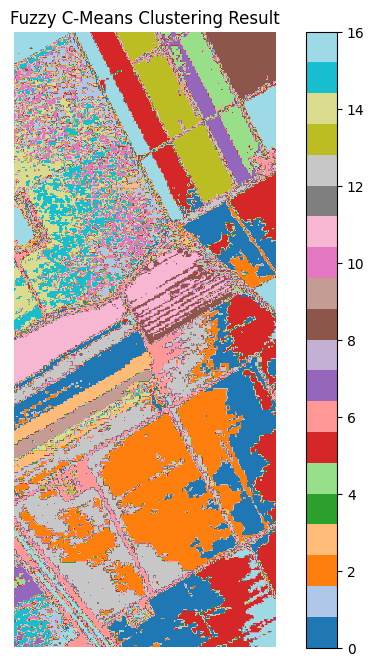

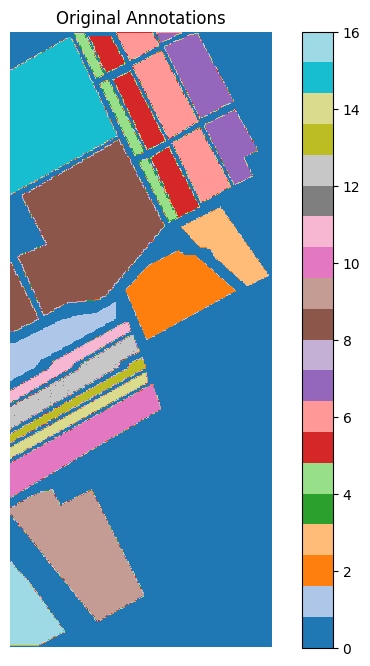

In [ ]:
# Reshape the FCM labels to match the original image dimensions
fcm_image = fcm_labels.reshape(salinas_labels.shape)

# Plot the FCM clustering result
plt.figure(figsize=(8, 8))
plt.imshow(fcm_image, cmap='tab20')
plt.title("Fuzzy C-Means Clustering Result")
plt.axis('off')
plt.colorbar()
plt.show()

# Plot the original annotations for comparison
plt.figure(figsize=(8, 8))
plt.imshow(salinas_labels, cmap='tab20')
plt.title("Original Annotations")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA with n_components=3
pca = PCA(n_components=3)
reduced_image = pca.fit_transform(reshaped_image)

print(f"Reduced image dimensions: {reduced_image.shape}")

Reduced image dimensions: (111104, 3)


In [ ]:
# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_variance_retained = sum(explained_variance_ratio) * 100

print(f"Explained variance ratio for each component: {explained_variance_ratio}")
print(f"Total variance retained with 3 components: {total_variance_retained:.2f}%")


Explained variance ratio for each component: [0.74473713 0.23531325 0.01134124]
Total variance retained with 3 components: 99.14%


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply KMeans on reduced data
kmeans_pca = KMeans(n_clusters=17, random_state=42, n_init='auto')
kmeans_pca_labels = kmeans_pca.fit_predict(reduced_image)

# Calculate Adjusted Rand Index (ARI)
ari_pca = adjusted_rand_score(reshaped_labels, kmeans_pca_labels)

# Calculate Silhouette Score
silhouette_pca = silhouette_score(reduced_image, kmeans_pca_labels)

print(f"Adjusted Rand Index (KMeans with PCA): {ari_pca:.3f}")
print(f"Silhouette Score (KMeans with PCA): {silhouette_pca:.3f}")


Adjusted Rand Index (KMeans with PCA): 0.147
Silhouette Score (KMeans with PCA): 0.435


What the results tell us:

Adjusted Rand Index (ARI): 0.147 (before and after)

Interpretation:
The ARI is an external evaluation metric that compares the clustering with the actual categories (ground truth). The fact that it remains the same before and after dimensionality reduction indicates that the information used by the KMeans algorithm for clustering was not affected by PCA. This may suggest that the 3 principal components contain almost all the necessary information for clustering.  

Silhouette Score: 0.413 (before), 0.435 (after)

Interpretation:
The Silhouette Score is an internal metric that measures cluster cohesion (how well each point "fits" in its cluster) and the separation from other clusters. The slight improvement suggests that PCA might have removed some noise or redundant information, making the clusters more cohesive. However, the minor improvement also indicates that the high original dimensionality was not a significant issue for KMeans.

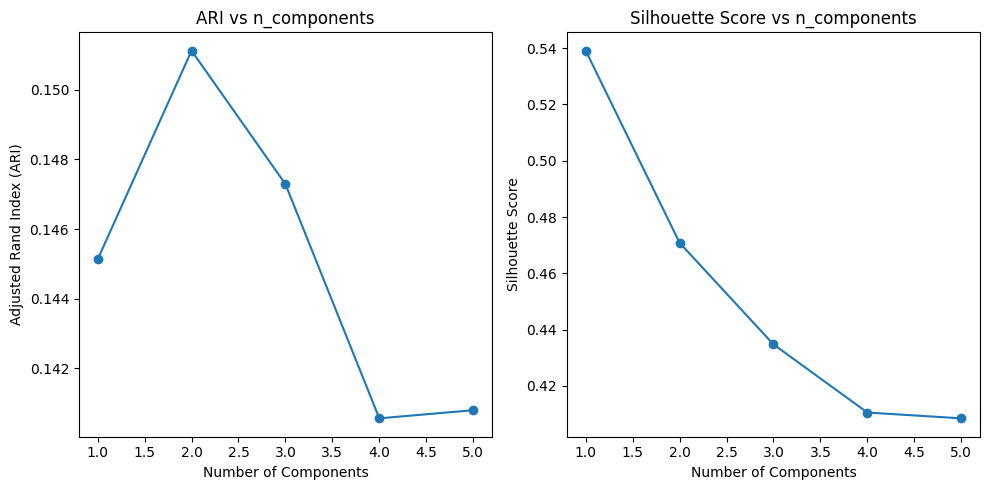

In [ ]:
# Test different values of n_components
ari_scores = []
silhouette_scores = []
components_range = range(1, 6)

for n in components_range:
    # Apply PCA with n_components=n
    pca_test = PCA(n_components=n)
    reduced_image_test = pca_test.fit_transform(reshaped_image)

    # Apply KMeans on reduced data
    kmeans_test = KMeans(n_clusters=17, random_state=42, n_init='auto')
    kmeans_test_labels = kmeans_test.fit_predict(reduced_image_test)

    # Calculate ARI and Silhouette Score
    ari = adjusted_rand_score(reshaped_labels, kmeans_test_labels)
    silhouette = silhouette_score(reduced_image_test, kmeans_test_labels)

    ari_scores.append(ari)
    silhouette_scores.append(silhouette)

# Plot ARI and Silhouette Score vs n_components
plt.figure(figsize=(10, 5))

# ARI Plot
plt.subplot(1, 2, 1)
plt.plot(components_range, ari_scores, marker='o')
plt.title("ARI vs n_components")
plt.xlabel("Number of Components")
plt.ylabel("Adjusted Rand Index (ARI)")

# Silhouette Plot
plt.subplot(1, 2, 2)
plt.plot(components_range, silhouette_scores, marker='o')
plt.title("Silhouette Score vs n_components")
plt.xlabel("Number of Components")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()

In [ ]:
print(ari_scores)
print(silhouette_scores )

[0.14513232878432328, 0.15112437989791155, 0.14729232332312386, 0.140564180768985, 0.14079764830171185]
[0.5391023840211777, 0.470826185323263, 0.434744159461474, 0.4105348243276934, 0.40846884570056324]


The maximum ARI value is 0.151 (with n_components=2).
The ARI values are generally close, which means that reducing the number of dimensions does not significantly change the relationship between the clusters and the actual categories.
When n_components is increased (e.g., 4 or 5), the ARI slightly decreases, which may indicate that PCA is beginning to include noise from the data.

The Silhouette Score is higher with n_components=1, which means that the clusters are more cohesive and well-separated when the data is reduced to one dimension.
As the number of dimensions increases, the Silhouette Score decreases, which may indicate that the additional dimensions add noise or create overlapping clusters.
Generally, the Silhouette Score is higher for lower dimensions, as KMeans benefits from the compaction of variance.

### Part 2

In [ ]:
 #!wget https://madm.dfki.de/files/sentinel/EuroSAT.zip --no-check-certificate
 #! unzip EuroSAT.zip

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

data_dir = os.path.join('2750')
print(f'Τα δεδομένα βρίσκονται στο: {data_dir}')


datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    validation_split=0.90  
)

dataset = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), 
    batch_size=1, 
    shuffle=False,
    subset='training'
)

print(f'Φορτώθηκαν {len(dataset) * dataset.batch_size} εικόνες.')


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  inflating: 2750/SeaLake/SeaLake_967.jpg  
  inflating: 2750/SeaLake/SeaLake_515.jpg  
  inflating: 2750/SeaLake/SeaLake_1465.jpg  
  inflating: 2750/SeaLake/SeaLake_1817.jpg  
  inflating: 2750/SeaLake/SeaLake_2902.jpg  
  inflating: 2750/SeaLake/SeaLake_2570.jpg  
  inflating: 2750/SeaLake/SeaLake_1004.jpg  
  inflating: 2750/SeaLake/SeaLake_174.jpg  
  inflating: 2750/SeaLake/SeaLake_2111.jpg  
  inflating: 2750/SeaLake/SeaLake_2388.jpg  
  inflating: 2750/SeaLake/SeaLake_1948.jpg  
  inflating: 2750/SeaLake/SeaLake_838.jpg  
  inflating: 2750/SeaLake/SeaLake_2738.jpg  
  inflating: 2750/SeaLake/SeaLake_1999.jpg  
  inflating: 2750/SeaLake/SeaLake_2359.jpg  
  inflating: 2750/SeaLake/SeaLake_2660.jpg  
  inflating: 2750/SeaLake/SeaLake_1775.jpg  
  inflating: 2750/SeaLake/SeaLake_605.jpg  
  inflating: 2750/SeaLake/SeaLake_2201.jpg  
  inflating: 2750/SeaLake/SeaLake_264.jpg  
  inflating: 2750/SeaLake/SeaLake_1314.jpg  
  infl

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.models import Model

# Load the pretrained MobileNetV3Small
base_model = MobileNetV3Small(weights='imagenet', include_top=False, pooling='avg')

# Summary of the model
base_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, None, None, 3)  │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, None, None, 16) │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, None, None, 16) │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, None, None, 16) │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 16) │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, None, None, 16) │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, None, None, 16) │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, None, None, 16) │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

In [ ]:
# Extract features from the dataset
features = base_model.predict(dataset, verbose=1)

print(f"Extracted features shape: {features.shape}")

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2700/2700 ━━━━━━━━━━━━━━━━━━━━ 60s 21ms/step
Extracted features shape: (2700, 576)


In [ ]:
from sklearn.cluster import KMeans
# Apply KMeans clustering
kmeans_cnn = KMeans(n_clusters=10, random_state=42, n_init='auto')
cnn_labels = kmeans_cnn.fit_predict(features)

print(f"KMeans Clustering Completed. Number of clusters: {len(set(cnn_labels))}")

KMeans Clustering Completed. Number of clusters: 10


In [ ]:
from sklearn.metrics import adjusted_rand_score

# Extract true labels from the dataset
true_labels = dataset.classes

# Calculate ARI
ari_cnn = adjusted_rand_score(true_labels, cnn_labels)

print(f"Adjusted Rand Index (CNN Features): {ari_cnn:.3f}")


Adjusted Rand Index (CNN Features): 0.501


In [ ]:
# Load the same subset of images used in KMeans
images, labels = [], []
for i in range(len(dataset)):
    image, label = dataset[i]
    if i < len(pixel_labels):  # Match the number of samples in pixel_labels
        images.append(image.flatten())
        labels.append(label)

# Convert to numpy arrays
true_labels_pixel = np.array(labels)
pixel_features = np.array(images)
# Convert true_labels_pixel to 1D array
true_labels_pixel = np.array(labels).reshape(-1, 10)  # Ensure it's (2700, 10)
true_labels_pixel = np.argmax(true_labels_pixel, axis=1)  # Convert one-hot to single label

print(f"True labels shape after flattening: {true_labels_pixel.shape}")


print(f"Pixel feature shape: {pixel_features.shape}")



True labels shape after flattening: (2700,)
Pixel feature shape: (2700, 150528)


In [ ]:
# Apply KMeans on pixel data
kmeans_pixel = KMeans(n_clusters=10, random_state=42, n_init='auto')
pixel_labels = kmeans_pixel.fit_predict(pixel_features)

# Calculate ARI
ari_pixel = adjusted_rand_score(true_labels_pixel, pixel_labels)

print(f"Adjusted Rand Index (Pixel Features): {ari_pixel:.3f}")

Adjusted Rand Index (Pixel Features): 0.151


In [ ]:
def plot_grid_for_clusters(features, labels, dataset, title, num_images=5):
    """
    Visualize a grid of images for each cluster.

    Args:
        features (array): Image features (CNN or pixel-based).
        labels (array): Cluster labels from KMeans.
        dataset: Original dataset object for retrieving images.
        title (str): Title for the plot.
        num_images (int): Number of random images to display per cluster.
    """
    num_clusters = len(set(labels))
    plt.figure(figsize=(20, num_clusters * 4))

    for cluster in range(num_clusters):
        # Find indices for the current cluster
        cluster_indices = [i for i, lbl in enumerate(labels) if lbl == cluster]

        # Select random indices (up to num_images)
        selected_indices = np.random.choice(cluster_indices, size=min(len(cluster_indices), num_images), replace=False)

        for idx, selected_index in enumerate(selected_indices):
            image, _ = dataset[selected_index]  # Load image

            # Undo preprocessing normalization for visualization
            image = (image + 1) / 2.0  # Convert from [-1, 1] to [0, 1]
            if image.shape[0] == 1:  # Remove batch dimension if exists
                image = np.squeeze(image, axis=0)
            image = (image - image.min()) / (image.max() - image.min())  # Normalize to [0, 1]

            # Plot the image
            plt.subplot(num_clusters, num_images, cluster * num_images + idx + 1)
            plt.imshow(image)
            plt.title(f"Cluster {cluster}")
            plt.axis("off")

    plt.suptitle(title, fontsize=16)
    plt.show()



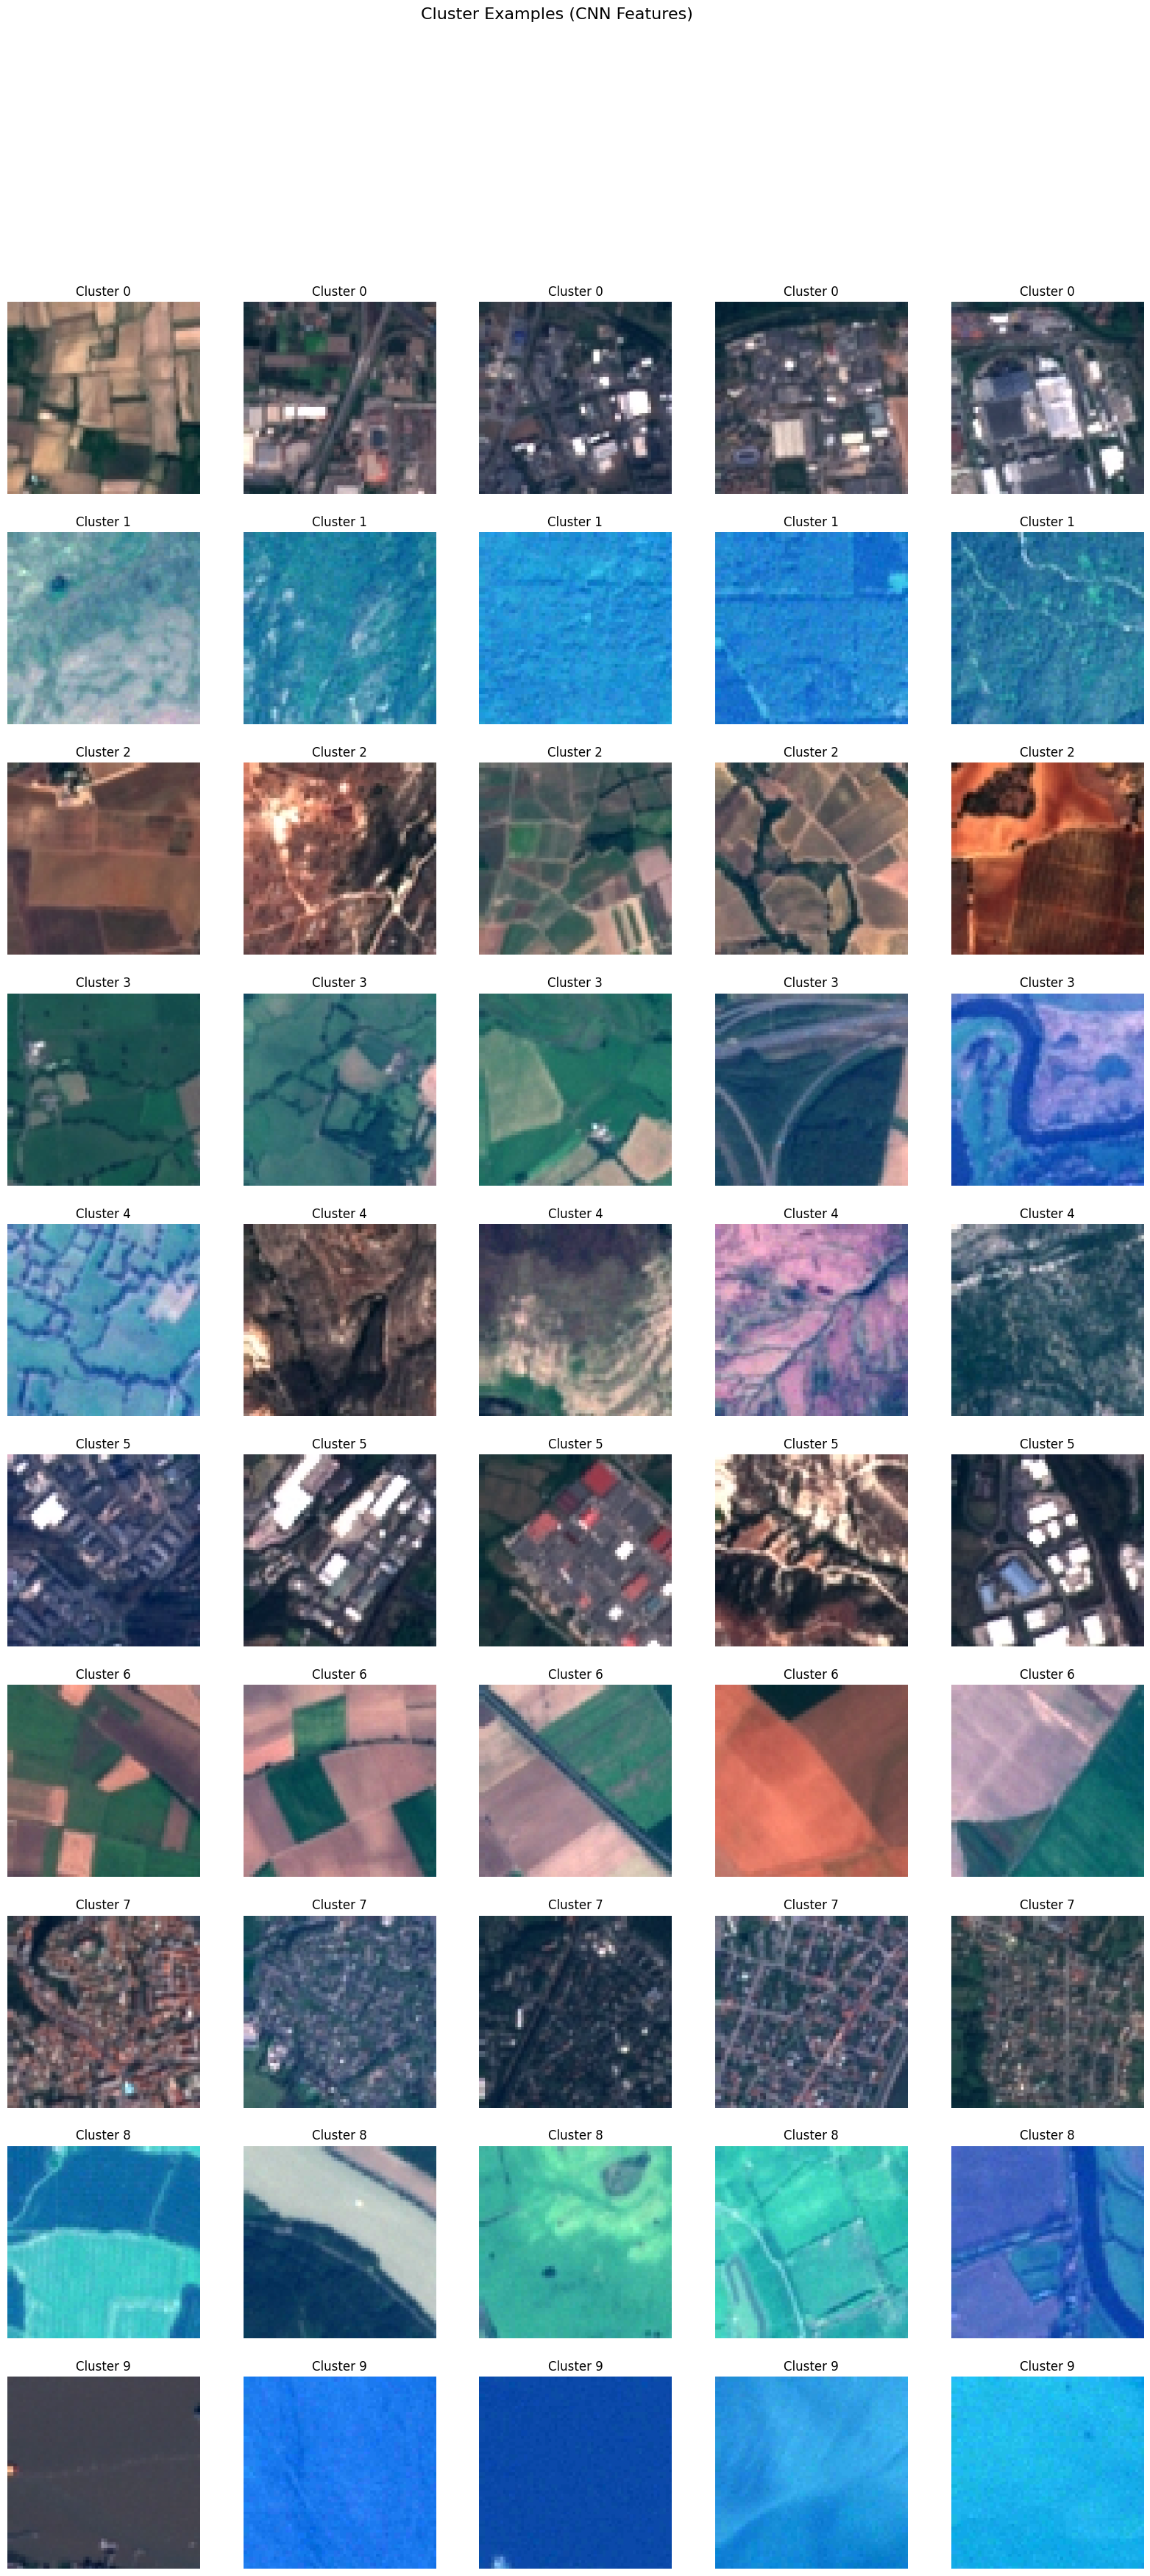

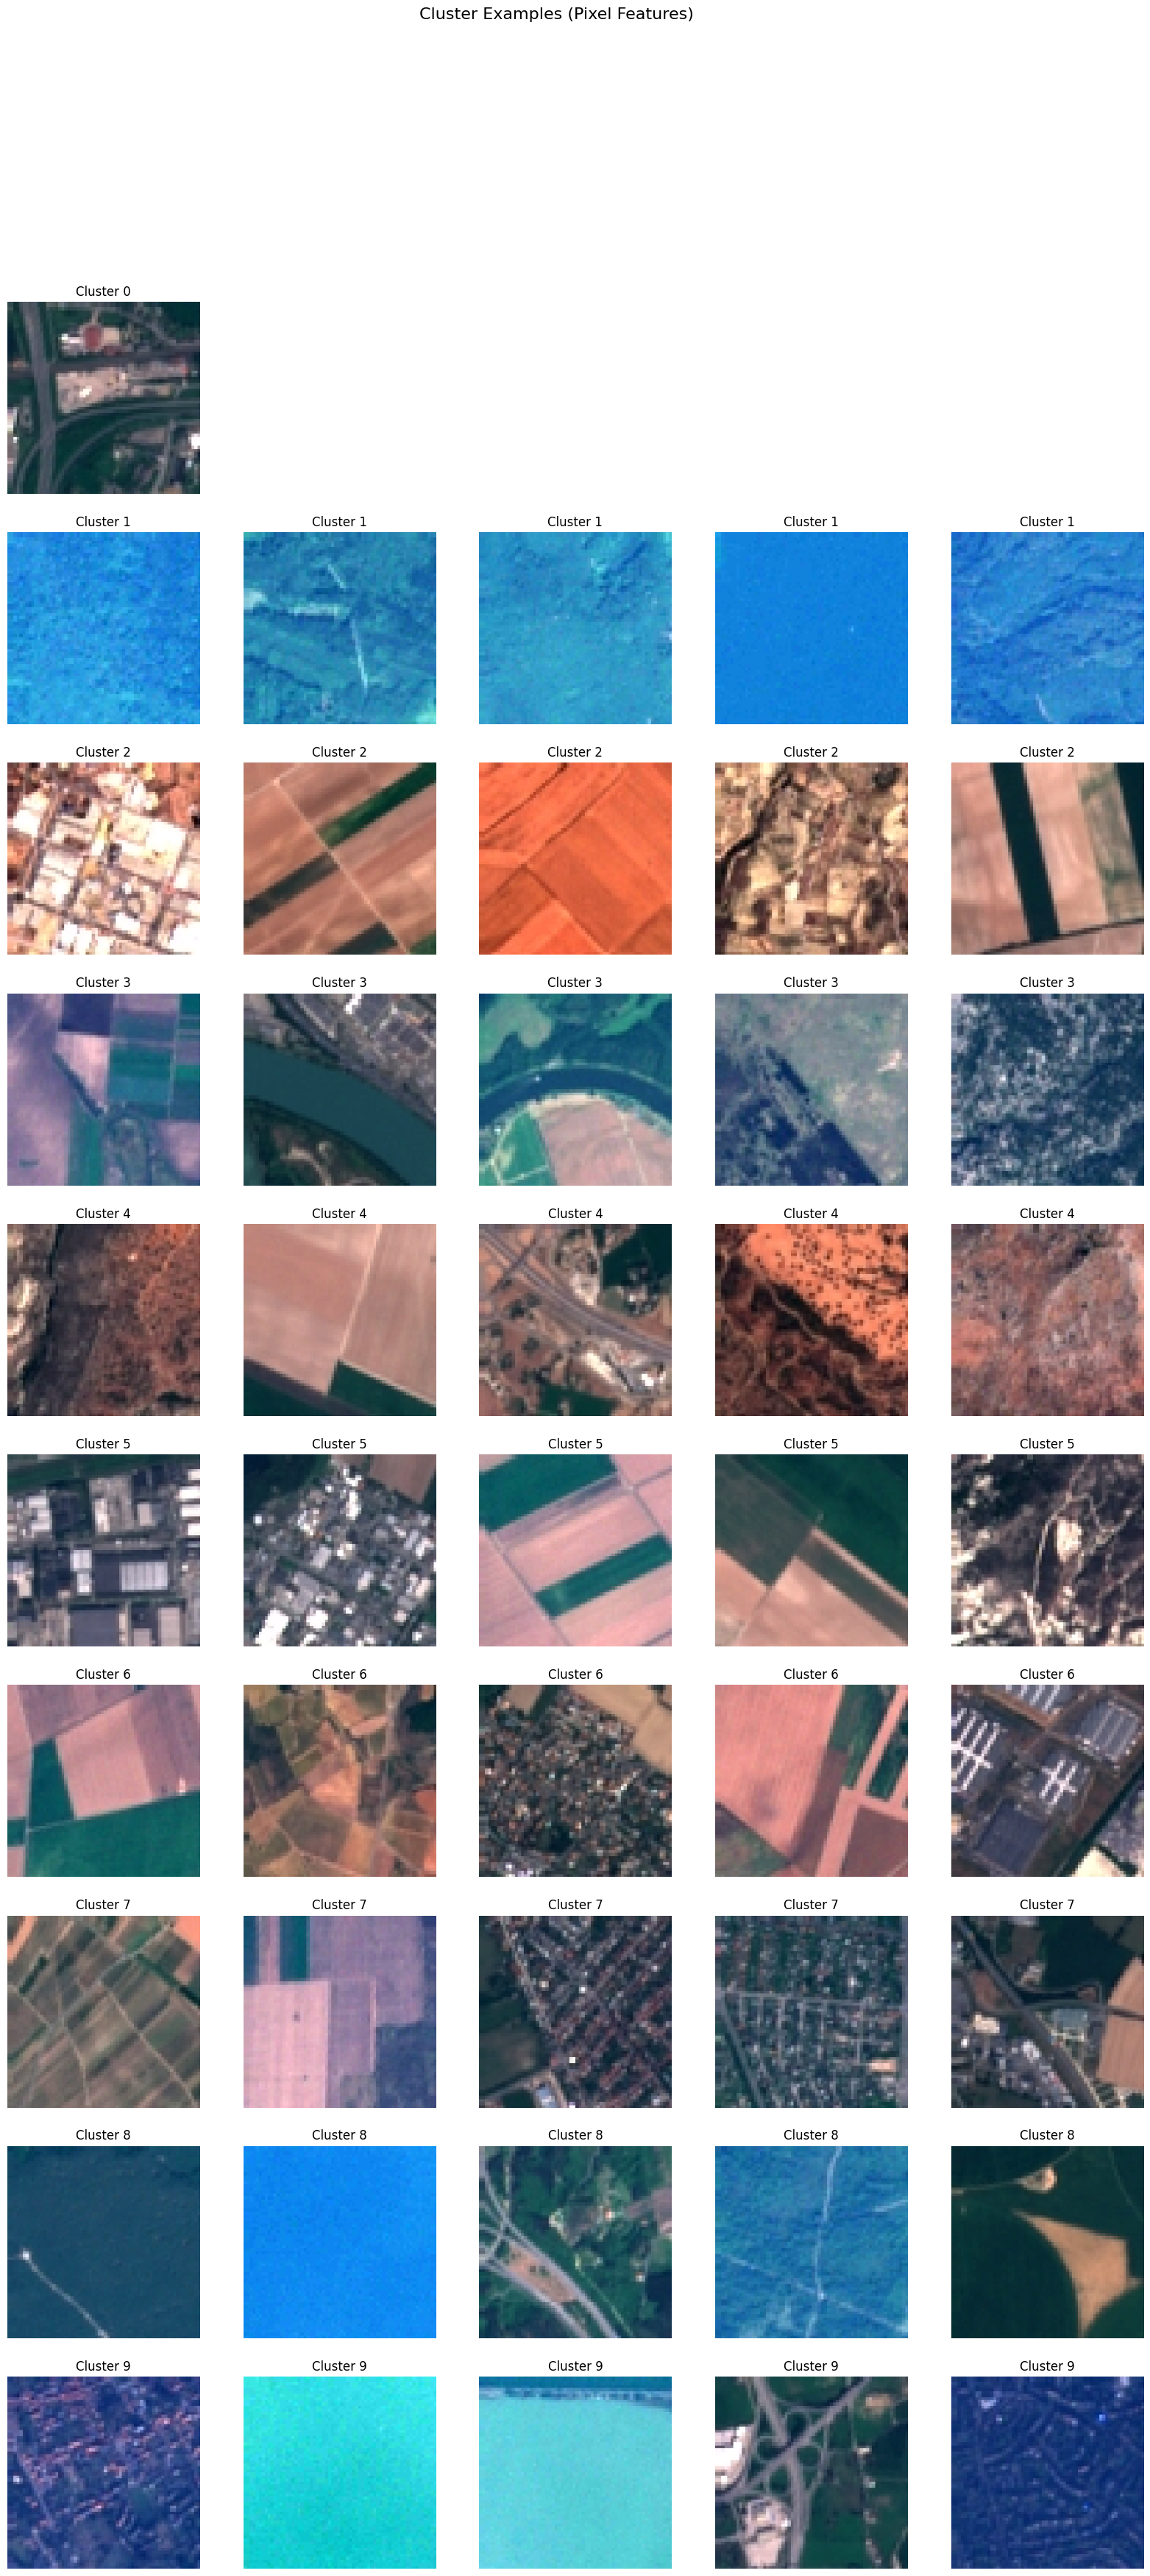

In [ ]:
plot_grid_for_clusters(
    features=features,
    labels=cnn_labels,
    dataset=dataset,
    title="Cluster Examples (CNN Features)"
)

plot_grid_for_clusters(
    features=pixel_features,
    labels=pixel_labels,
    dataset=dataset,
    title="Cluster Examples (Pixel Features)"
)


1) Is the separation of images into clusters evident?  

CNN Features:
Better separation is expected, as the CNN extracts abstract features that are more representative of each category.
The images within the clusters share common patterns, such as similar objects or textures.  

Pixel Features:
The clusters appear to be noisier since they rely on raw pixel values without high-level analysis.

2) Do you notice common characteristics or patterns in the images of each cluster?  

CNN Features:
The images within each cluster exhibit greater similarity, for example, showing the same types of landscapes (forests, rivers, etc.).  

Pixel Features:
The clusters may include unrelated images, since pixels do not capture the overall content of the image.

3) How do the CNN clusters compare with the Pixel Features clusters?  

CNN:
They result in better clustering with more distinct differences between clusters.  

Pixel:
The clusters overlap, especially when there are common colors or patterns among different categories.

4) Does the use of CNN Features reflect better separation?  

The CNN extracts abstract features that are more useful for clustering.  
The results of the Adjusted Rand Index (ARI) reflect this difference.